In [1]:
import pandas as pd 
import yfinance as yf
from datetime import datetime, timedelta


In [2]:
SP500_Url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
data_table = pd.read_html(
    SP500_Url,
    storage_options={"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 "
                                   "(KHTML, like Gecko) Chrome/123.0 Safari/537.36"}
)
data_table

[    Symbol             Security             GICS Sector  \
 0      MMM                   3M             Industrials   
 1      AOS          A. O. Smith             Industrials   
 2      ABT  Abbott Laboratories             Health Care   
 3     ABBV               AbbVie             Health Care   
 4      ACN            Accenture  Information Technology   
 ..     ...                  ...                     ...   
 498    XYL           Xylem Inc.             Industrials   
 499    YUM          Yum! Brands  Consumer Discretionary   
 500   ZBRA   Zebra Technologies  Information Technology   
 501    ZBH        Zimmer Biomet             Health Care   
 502    ZTS               Zoetis             Health Care   
 
                                 GICS Sub-Industry    Headquarters Location  \
 0                        Industrial Conglomerates    Saint Paul, Minnesota   
 1                               Building Products     Milwaukee, Wisconsin   
 2                           Health Care 

In [3]:
tickers = data_table[0]["Symbol"].tolist()

In [4]:
for i in range(len(tickers)):
    if tickers[i] == 'BRK.B':
        tickers[i] = 'BRK-B'
    elif tickers[i] == 'BF.B':
        tickers[i] = 'BF-B'

In [5]:
data_table[1]

Effective Date  Added                                Removed  \
         Effective Date Ticker                       Security  Ticker   
0    September 22, 2025    EME                          Emcor    ENPH   
1    September 22, 2025   HOOD              Robinhood Markets     CZR   
2    September 22, 2025    APP                       AppLovin    MKTX   
3       August 28, 2025   IBKR            Interactive Brokers     WBA   
4         July 23, 2025    XYZ                    Block, Inc.     HES   
..                  ...    ...                            ...     ...   
374   December 11, 1998   CPWR                      Compuware     SUN   
375       June 17, 1997    CCR  Countrywide Credit Industries     USL   
376  September 30, 1994    NCC                  National City     MCK   
377        July 1, 1976    BUD                 Anheuser Busch     HNG   
378        July 1, 1976    DIS        The Walt Disney Company     AYE   

                               \
                     Security   
0              Enphase Energy   
1       Caesars Entertainment   
2                 MarketAxess   
3    Walgreens Boots Alliance   
4            Hess Corporation   
..                        ...   
374                SunAmerica   
375                    USLife   
376                  McKesson   
377       Houston Natural Gas   
378          Allegheny Energy   

                                                Reason  
                                                Reason  
0                     Market capitalization change.[4]  
1                     Market capitalization change.[4]  
2                     Market capitalization change.[4]  
3    Sycamore Partners acquired Walgreen Boots Alli...  
4    S&P 500 and S&P 100 constituent Chevron Corp. ...  
..                                                 ...  
374                     AIG purchased SunAmerica.[267]  
375                          AIG acquired USLife.[268]  
376  McKesson sold PCS Health Services to Eli Lilly...  
377  Major restructuring of S&P 500 to have fewer i...  
378  Major restructuring of S&P 500 to have fewer i...  

[379 rows x 6 columns]

In [6]:
# Extraction des données
Date = data_table[1]['Effective Date'].astype(str).apply(pd.to_datetime)
Removed = data_table[1]['Removed']['Ticker']  # Supposant que 'Removed' est un DataFrame ou Series
Added = data_table[1]['Added']['Ticker']      # Supposant que 'Added' est un DataFrame ou Series

# Combinaison des données dans un DataFrame
Data_Change = pd.concat([Date, Added, Removed], axis = 1)

#Date au format Date
#Data_Change['Date'] = pd.to_datetime(Data_Change['Date'])

# Changer le format de la date en 'jour/mois/année'
#Data_Change['Date'] = Data_Change['Date'].dt.strftime('%Y-%m-%d')


# Renommer toutes les colonnes
Data_Change.columns = ['Date', 'Added', 'Removed']

# Mettre 'colonne_a' en tant qu'index
Data_Change.set_index('Date', inplace=True)

# Nan en vide
Data_Change = Data_Change.fillna('')

Data_Change

,Added,Removed
Date,,
2025-09-22,EME,ENPH
2025-09-22,HOOD,CZR
2025-09-22,APP,MKTX
2025-08-28,IBKR,WBA
2025-07-23,XYZ,HES
...,...,...
1998-12-11,CPWR,SUN
1997-06-17,CCR,USL
1994-09-30,NCC,MCK


In [7]:
len(tickers)

503

In [8]:
# Supposons que la liste tickers ait déjà 503 éléments au départ
# tickers = ['AAPL', 'MSFT', ...]  # Exemples de tickers initiaux

# Initialiser un dictionnaire vide
dict = {}

# Boucle pour parcourir les données et mettre à jour le dictionnaire
for i in range(0, len(Data_Change)):
    
    # Ajouter les nouveaux tickers (si ce n'est pas déjà un ensemble vide)
    tickers.extend(Data_Change.Added[i])
    
    # Essayer de supprimer les tickers retirés, si possible
    try:
        tickers = [t for t in tickers if t not in Data_Change.Removed[i]]  # Supprimer les tickers retirés
    except ValueError:
        # Si l'élément à supprimer n'existe pas dans la liste, continuer sans erreur
        pass
    
    # Trier les tickers
    tickers = sorted(set(tickers))  # Utilisation de set pour éviter les doublons

    # Ajouter une **copie** de la liste `tickers` dans le dictionnaire
    dict[Data_Change.index[i]] = tickers.copy()

df = pd.DataFrame(list(dict.items()), columns=['date', 'tickers'])

df['date'] = pd.to_datetime(df['date'])

# Mettre la colonne 'date' comme index
df.set_index('date', inplace=True)

df

/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_1487/1527443372.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tickers.extend(Data_Change.Added[i])
/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_1487/1527443372.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tickers = [t for t in tickers if t not in Data_Change.Removed[i]]  # Supprimer les tickers retirés


,tickers
date,
2025-09-22,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-08-28,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-23,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-18,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-09,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
...,...
1999-04-12,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
1998-12-11,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
1997-06-17,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."


In [9]:
# Récupère l'index en liste
new_index = list(df.index)

# Remplace la première valeur
new_index[0] = datetime.today().date()

# Réapplique l'index modifié
df.index = pd.to_datetime(new_index)

In [10]:
df

,tickers
2025-10-07,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
2025-08-28,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-23,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-18,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
2025-07-09,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
...,...
1999-04-12,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD..."
1998-12-11,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
1997-06-17,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."
1994-09-30,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ..."


In [11]:

data_SP500_old = pd.read_parquet('/Users/forget/Library/Mobile Documents/com~apple~CloudDocs/Project Stock Market Deep Learning/Data/data_SP500.parquet')
last_date = data_SP500_old['Date'].sort_values(ascending=True).iloc[-1] + timedelta(days=1)
last_date


Timestamp('2025-10-04 00:00:00')

In [12]:
df['Last_Date'] = last_date
df

,tickers,Last_Date
2025-10-07,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD...",2025-10-04
2025-08-28,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
2025-07-23,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
2025-07-18,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
2025-07-09,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
...,...,...
1999-04-12,"[A, AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, AD...",2025-10-04
1998-12-11,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
1997-06-17,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04
1994-09-30,"[AAPL, ABBV, ABNB, ABT, ACGL, ACN, ADBE, ADI, ...",2025-10-04


In [13]:

# Initialiser une DataFrame vide pour stocker toutes les données
data_SP500 = pd.DataFrame()

df = df.explode('tickers')
end_date = df[df.index > last_date].groupby('tickers').apply(lambda x: x.index.max())

# Combiner les résultats dans une nouvelle DataFrame
resultat = pd.DataFrame({'Start': last_date, 'End': end_date})
resultat


/var/folders/6k/82j2nnl13hj9ld7nmzpdt6fh0000gn/T/ipykernel_1487/2328952231.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  end_date = df[df.index > last_date].groupby('tickers').apply(lambda x: x.index.max())


,Start,End
tickers,,
A,2025-10-04,2025-10-07
AAPL,2025-10-04,2025-10-07
ABBV,2025-10-04,2025-10-07
ABNB,2025-10-04,2025-10-07
ABT,2025-10-04,2025-10-07
...,...,...
XYZ,2025-10-04,2025-10-07
YUM,2025-10-04,2025-10-07
ZBH,2025-10-04,2025-10-07


In [14]:
"""
# Initialiser une DataFrame vide pour stocker toutes les données
data_SP500 = pd.DataFrame()

df = df.explode('tickers')
start_date = df.groupby('tickers').apply(lambda x: x.index.min())
end_date = df.groupby('tickers').apply(lambda x: x.index.max())

# Combiner les résultats dans une nouvelle DataFrame
resultat = pd.DataFrame({'Start': start_date, 'End': end_date})
resultat
"""

"\n# Initialiser une DataFrame vide pour stocker toutes les données\ndata_SP500 = pd.DataFrame()\n\ndf = df.explode('tickers')\nstart_date = df.groupby('tickers').apply(lambda x: x.index.min())\nend_date = df.groupby('tickers').apply(lambda x: x.index.max())\n\n# Combiner les résultats dans une nouvelle DataFrame\nresultat = pd.DataFrame({'Start': start_date, 'End': end_date})\nresultat\n"

In [15]:
# Télécharger les données pour chaque ticker
for ticker in resultat.index:
    start_date = resultat.loc[ticker, 'Start']
    end_date = resultat.loc[ticker, 'End']

    print(f"Téléchargement des données pour {ticker} de {start_date} à {end_date}")

    # Télécharger les données de l'action entre les dates spécifiées
    data = yf.download(
                        ticker,
                        start=start_date,
                        end=end_date,
                        interval="1d",
                        auto_adjust=True,
                        actions=False
                        )

    # Ajouter une colonne pour identifier le ticker
    data['Ticker'] = ticker

    # On retire le niveau des tickers pour ne garder que 'Close' et 'Volume'
    data.columns = data.columns.droplevel(level=1)
    
    # Concaténer les données dans la DataFrame globale
    data_SP500 = pd.concat([data_SP500, data])

# Affichage de la DataFrame résultante
data_SP500

Téléchargement des données pour A de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AAPL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ABBV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ABNB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ABT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ACGL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ACN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ADBE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ADI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ADM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ADP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ADSK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AEE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AEP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AES de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AFL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AIG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AIZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AJG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AKAM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ALB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ALGN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ALL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ALLE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMAT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AMCR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AME de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMGN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AMP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AMT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AMZN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ANET de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AON de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AOS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour APA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour APD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour APH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour APO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour APP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour APTV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ARE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ATO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AVB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AVGO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AVY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AWK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AXON de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour AXP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour AZO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BAC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BALL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BAX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BBY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BDX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BEN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BF-B de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BIIB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BKNG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BKR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BLDR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BLK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BMY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BRK-B de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BRO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BSX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour BX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour BXP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CAG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CAH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CARR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CAT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CBOE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CBRE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CCI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CCL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CDNS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CDW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CEG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CFG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CHD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CHRW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CHTR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CINF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CLX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CMCSA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CME de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CMG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CMI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CMS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CNC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CNP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour COF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour COIN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour COO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour COP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour COR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour COST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CPAY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CPB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CPRT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CPT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CRL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CRM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CRWD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CSCO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CSGP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CSX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CTAS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CTRA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CTSH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CTVA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour CVS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour CVX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour D de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DAL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DASH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DAY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DDOG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DECK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DELL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DGX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DHI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DHR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DIS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DLR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DLTR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DOC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DOV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DOW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DPZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DRI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

Téléchargement des données pour DTE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00



[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DUK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DVA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour DVN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour DXCM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EBAY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ECL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ED de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EFX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EIX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ELV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EME de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EMN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EMR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EOG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EPAM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EQIX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EQR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EQT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ERIE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ES de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ESS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ETN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ETR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EVRG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EXC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EXE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EXPD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour EXPE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour EXR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour F de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FANG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FAST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FCX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FDS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FDX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FFIV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FICO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FIS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FITB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FOX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FOXA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FRT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FSLR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour FTNT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour FTV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GDDY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GEHC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GEN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GEV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GILD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GIS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GLW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GNRC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GOOG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GOOGL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GPC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GPN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GRMN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour GS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour GWW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour H de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HAL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HAS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HBAN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HCA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HIG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HII de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HLT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HOLX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HON de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HOOD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HPE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HPQ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HRL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HSIC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HSY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HUBB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour HUM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour HWM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IBKR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IBM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ICE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IDXX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IEX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IFF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour INCY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour INTC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour INTU de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour INVH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IPG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IQV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour IR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IRM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ISRG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ITW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour IVZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour J de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour JBHT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour JBL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour JCI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour JKHY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour JNJ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour JPM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KDP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KEY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KEYS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KHC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KIM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KKR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KLAC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KMB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KMI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KMX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour KR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour KVUE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour L de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LDOS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LEN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LHX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LII de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LIN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LKQ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LLY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LMT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LNT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LOW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LRCX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LULU de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LUV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LVS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour LYB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour LYV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MAA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MAR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MAS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MCD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MCHP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MCK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MCO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MDLZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MDT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MET de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour META de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MGM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MHK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MKC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MLM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MMC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MMM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MNST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MOH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MOS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MPC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MPWR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MRK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MRNA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MSCI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MSFT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MSI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MTB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MTCH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour MTD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour MU de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NCLH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NDAQ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NDSN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NEE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NEM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NFLX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NKE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NOC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NOW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NRG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NSC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NTAP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NTRS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NUE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NVDA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NVR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NWS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour NWSA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour NXPI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour O de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ODFL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour OKE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour OMC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ON de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ORCL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ORLY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour OTIS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour OXY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
['P']: YFPricesMissingError('possibly delisted; no price data found  (1d 2025-10-04 00:00:00 -> 2025-10-07 00:00:00)')


Téléchargement des données pour P de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PANW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PAYC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PAYX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PCAR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PCG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PEG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PEP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PFE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PFG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PGR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PHM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PKG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PLD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PLTR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PNC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PNR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PNW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PODD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour POOL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PPG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PPL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PRU de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PSA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PSKY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PSX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PTC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour PWR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour PYPL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour QCOM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour RCL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour REG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour REGN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour RF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour RJF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour RL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour RMD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ROK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ROL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ROP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ROST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour RSG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour RTX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour RVTY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SBAC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SBUX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SCHW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SHW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SJM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SLB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SMCI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SNA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SNPS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SOLV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SPG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SPGI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SRE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour STE de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour STLD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour STT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour STX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour STZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SWK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SWKS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SYF de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour SYK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour SYY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TAP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TDG de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TDY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TECH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TEL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TER de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TFC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TGT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TJX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TKO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TMO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TMUS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TPL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TPR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TRGP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TRMB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TROW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TRV de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TSCO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TSLA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TSN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TTD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TTWO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TXN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour TXT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour TYL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour UAL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour UBER de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour UDR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour UHS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ULTA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour UNH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour UNP de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour UPS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour URI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour USB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour V de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VICI de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour VLO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VLTO de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour VMC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VRSK de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour VRSN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VRTX de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour VST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VTR de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour VTRS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour VZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WAB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WAT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WBD de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WDAY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WDC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WEC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WELL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WFC de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WMB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WMT de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WRB de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WSM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WST de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WTW de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour WY de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour WYNN de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour XEL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour XOM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour XYL de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour XYZ de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour YUM de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ZBH de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Téléchargement des données pour ZBRA de 2025-10-04 00:00:00 à 2025-10-07 00:00:00
Téléchargement des données pour ZTS de 2025-10-04 00:00:00 à 2025-10-07 00:00:00


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,Ticker,Adj Close
Date,,,,,,,
2025-10-06,141.610001,141.940002,139.899994,141.509995,1538400.0,A,NaN
2025-10-06,256.690002,259.070007,255.050003,257.989990,44292200.0,AAPL,NaN
2025-10-06,230.190002,232.949997,227.919998,231.710007,10903500.0,ABBV,NaN
2025-10-06,120.349998,123.150002,120.050003,120.730003,5469000.0,ABNB,NaN
2025-10-06,133.740005,135.240005,133.449997,134.320007,6682000.0,ABT,NaN
...,...,...,...,...,...,...,...
2025-10-06,77.779999,78.800003,76.690002,77.550003,5318100.0,XYZ,NaN
2025-10-06,148.779999,150.669998,148.600006,150.089996,1395000.0,YUM,NaN
2025-10-06,98.830002,101.309998,98.779999,101.029999,1065500.0,ZBH,NaN


In [16]:
data_SP500 = data_SP500.reset_index()
data_SP500

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2025-10-06,141.610001,141.940002,139.899994,141.509995,1538400.0,A,NaN
1,2025-10-06,256.690002,259.070007,255.050003,257.989990,44292200.0,AAPL,NaN
2,2025-10-06,230.190002,232.949997,227.919998,231.710007,10903500.0,ABBV,NaN
3,2025-10-06,120.349998,123.150002,120.050003,120.730003,5469000.0,ABNB,NaN
4,2025-10-06,133.740005,135.240005,133.449997,134.320007,6682000.0,ABT,NaN
...,...,...,...,...,...,...,...,...
495,2025-10-06,77.779999,78.800003,76.690002,77.550003,5318100.0,XYZ,NaN
496,2025-10-06,148.779999,150.669998,148.600006,150.089996,1395000.0,YUM,NaN
497,2025-10-06,98.830002,101.309998,98.779999,101.029999,1065500.0,ZBH,NaN
498,2025-10-06,301.940002,309.079987,298.959991,308.079987,558200.0,ZBRA,NaN


In [17]:
df_concat = pd.concat([data_SP500, data_SP500_old])
df_concat

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2025-10-06,141.610001,141.940002,139.899994,141.509995,1538400.0,A,NaN
1,2025-10-06,256.690002,259.070007,255.050003,257.989990,44292200.0,AAPL,NaN
2,2025-10-06,230.190002,232.949997,227.919998,231.710007,10903500.0,ABBV,NaN
3,2025-10-06,120.349998,123.150002,120.050003,120.730003,5469000.0,ABNB,NaN
4,2025-10-06,133.740005,135.240005,133.449997,134.320007,6682000.0,ABT,NaN
...,...,...,...,...,...,...,...,...
737,2025-10-03,47.169998,47.330002,46.689999,46.689999,2766500.0,IP,NaN
734,2025-10-03,28.639999,28.934999,28.615000,28.709999,3691600.0,INVH,NaN
731,2025-10-03,679.940002,688.369995,677.059998,677.059998,1293900.0,INTU,NaN
761,2025-10-03,24.040001,24.209999,23.799999,23.870001,4505800.0,IVZ,NaN


In [18]:
df_concat.sort_values(by=['Date'], ascending=True, inplace=True)
df_concat.tail(50)

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
358,2025-10-06,124.370003,124.959999,123.260002,124.959999,2936000.0,PAYX,NaN
359,2025-10-06,98.519997,99.580002,97.300003,98.160004,3159000.0,PCAR,NaN
360,2025-10-06,16.040001,16.170000,15.860000,15.900000,29365300.0,PCG,NaN
361,2025-10-06,81.839996,82.580002,80.120003,82.500000,3733100.0,PEG,NaN
362,2025-10-06,139.699997,141.850006,138.880005,141.770004,6744100.0,PEP,NaN
363,2025-10-06,26.430000,27.360001,26.389999,27.270000,62811500.0,PFE,NaN
364,2025-10-06,84.180000,85.000000,83.339996,84.250000,830300.0,PFG,NaN
365,2025-10-06,150.410004,152.320007,150.399994,151.500000,6734800.0,PG,NaN
366,2025-10-06,240.500000,245.000000,239.410004,244.559998,3813200.0,PGR,NaN
367,2025-10-06,135.479996,138.100006,134.149994,137.720001,1419500.0,PHM,NaN


In [19]:
df_concat['Date'].max()

Timestamp('2025-10-06 00:00:00')

In [20]:
# Sauvegarder la DataFrame résultante dans un fichier CSV
#data_SP500.to_csv('/Users/forget/PyCharmMiscProject/historical_data_S&P500_From_Wiki.csv')

In [21]:
"""
mask_1 = data_SP500[(data_SP500['Ticker'] == 'NVR') & (data_SP500['Date'] < '1993-10-01')]
mask_2 = data_SP500[(data_SP500['Ticker'] == 'HUBB') & (data_SP500['Date'] < '1994-10-31')]
mask_3 = data_SP500[(data_SP500['Date'] == '1984-12-31') & (data_SP500['Ticker'] == 'BEN')]
"""

"\nmask_1 = data_SP500[(data_SP500['Ticker'] == 'NVR') & (data_SP500['Date'] < '1993-10-01')]\nmask_2 = data_SP500[(data_SP500['Ticker'] == 'HUBB') & (data_SP500['Date'] < '1994-10-31')]\nmask_3 = data_SP500[(data_SP500['Date'] == '1984-12-31') & (data_SP500['Ticker'] == 'BEN')]\n"

In [22]:
"""
idx_to_drop = mask_1.index.union(mask_2.index).union(mask_3.index)
data_SP500 = data_SP500.drop(index=idx_to_drop).copy()
"""

'\nidx_to_drop = mask_1.index.union(mask_2.index).union(mask_3.index)\ndata_SP500 = data_SP500.drop(index=idx_to_drop).copy()\n'

In [23]:
df_concat.to_parquet("/Users/forget/Library/Mobile Documents/com~apple~CloudDocs/Project Stock Market Deep Learning/Data/data_SP500.parquet")

In [24]:
data_SP500.sort_values(by='Date', ascending=True)

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close
0,2025-10-06,141.610001,141.940002,139.899994,141.509995,1538400.0,A,NaN
341,2025-10-06,135.589996,138.529999,135.559998,137.990005,1158100.0,NUE,NaN
340,2025-10-06,132.210007,133.919998,130.570007,133.250000,800900.0,NTRS,NaN
339,2025-10-06,120.419998,120.540001,117.570000,119.989998,1636800.0,NTAP,NaN
338,2025-10-06,299.649994,301.529999,298.570007,301.440002,2072600.0,NSC,NaN
...,...,...,...,...,...,...,...,...
159,2025-10-06,134.770004,135.490005,132.789993,133.199997,2218300.0,EMR,NaN
158,2025-10-06,63.720001,64.559998,63.430000,64.160004,1347200.0,EMN,NaN
157,2025-10-06,670.000000,679.020020,657.500000,657.640015,592100.0,EME,NaN
170,2025-10-06,77.480003,77.709999,76.629997,76.639999,2480800.0,EVRG,NaN


In [25]:
a = data_SP500.copy()

In [26]:
b = a[a['Ticker'] == 'BEN']

In [27]:
b = a[(a['Ticker'] == 'BEN') & (a['Date'] < '1985-02-01') & (a['Date'] > '1984-12-01')].sort_values('Date')
b

Price,Date,Close,High,Low,Open,Volume,Ticker,Adj Close


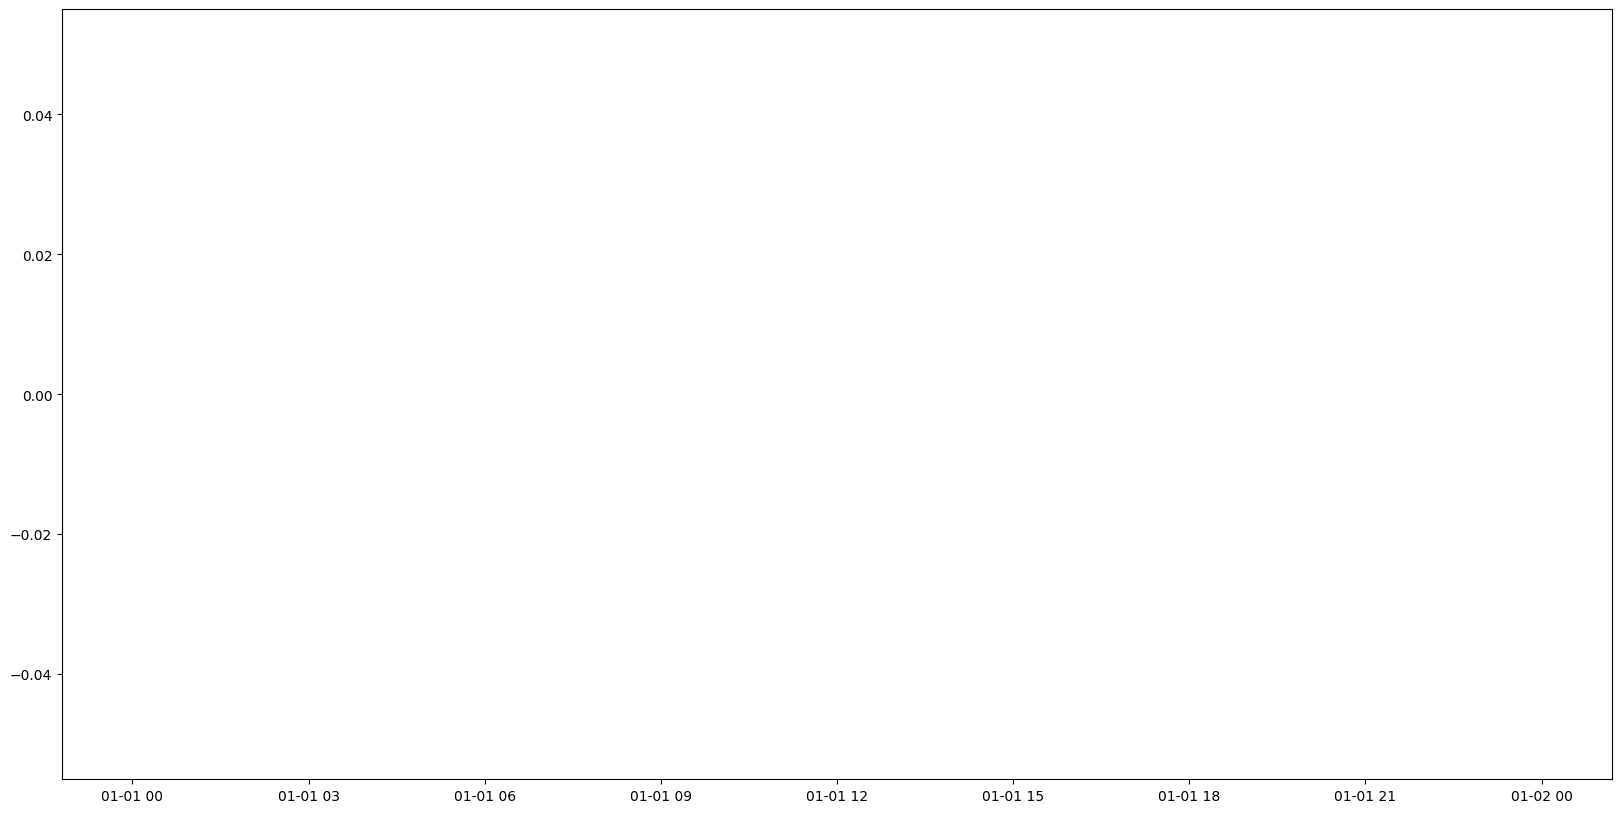

In [28]:
import matplotlib.pyplot as plt

x = b['Date']
y = b['Close']
plt.figure(figsize=(20, 10))
plt.scatter(x, y, s=1)